### Assignment 1 Part 2 Analysis

In this notebook, I will be showing my analysis and the relevant code for that. Some figures from this notebook are used in the report.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os




# Load the CSV file (adjust the filename as needed)
df = pd.read_csv("experiment_results_combined.csv")

df_vi = df[df["algorithm"] == "value_iteration"]
df_pi = df[df["algorithm"] == "policy_iteration"]
df_zero = df[df['complexity'] == 0]

# Inspect the first few rows
print(df.head())

# Ensure the results directory exists for saving figures
os.makedirs("analysis_results", exist_ok=True)


   grid_size  complexity  run         algorithm  iterations  \
0          4         0.0    0   value_iteration         848   
1          4         0.0    0  policy_iteration           2   
2          4         0.1    0   value_iteration        1146   
3          4         0.1    0  policy_iteration           5   
4          4         0.1    1   value_iteration        1132   

   final_avg_utility                  env_label  
0          -4.999015  env_grid4_complex0.0_run0  
1          -4.999025  env_grid4_complex0.0_run0  
2          95.256033  env_grid4_complex0.1_run0  
3          95.256522  env_grid4_complex0.1_run0  
4          83.764856  env_grid4_complex0.1_run1  


#### Key Definitions
**Grid size** refers to the area of the grid environment, but in the code is sometimes defined as the length of the environment. When referred to in markdown grid size will refer to the area.

**Complexity** is a custom parameter that I created when running experiments during this assignment. In essence, complexity refers to the percentage of the grid environment that contains a feature (e.g. wall, reward or penalty). 

#### Complexity = 0

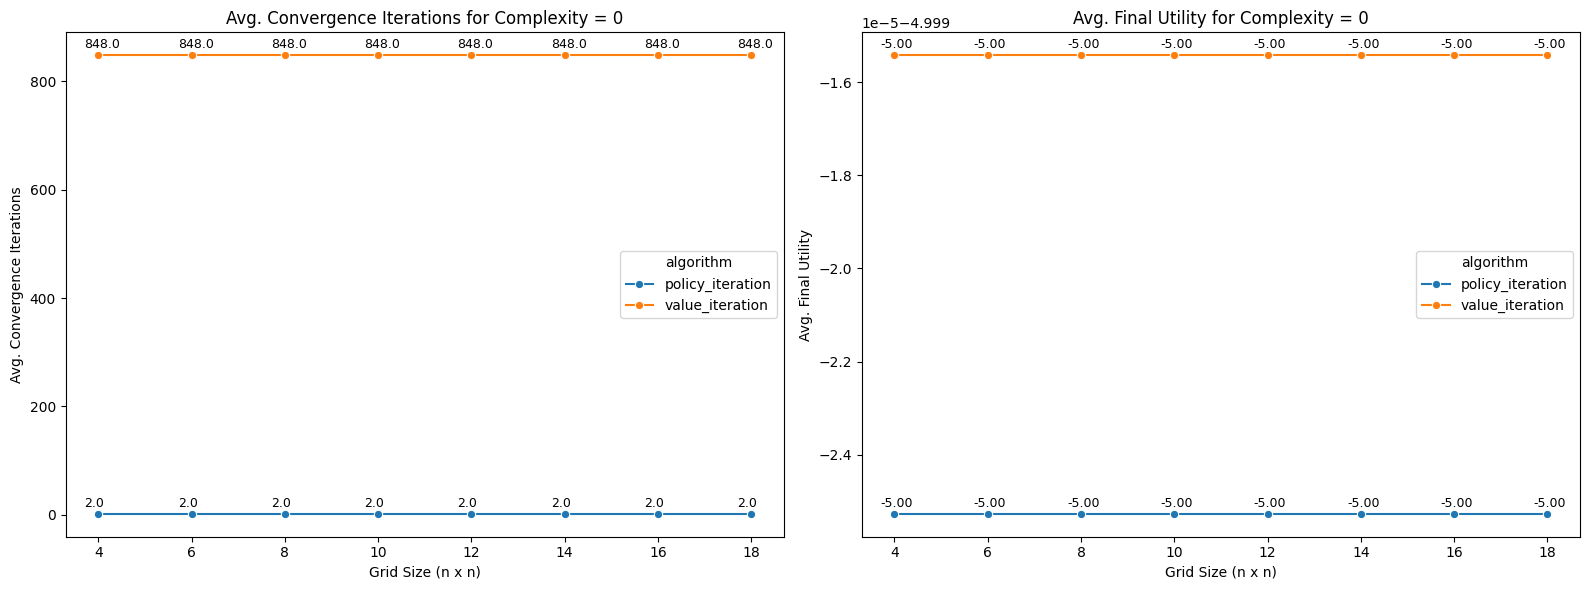

In [2]:
# Group data by grid size and algorithm
avg_iter_zero = df_zero.groupby(["grid_size", "algorithm"])["iterations"].mean().reset_index()
avg_util_zero = df_zero.groupby(["grid_size", "algorithm"])["final_avg_utility"].mean().reset_index()

# Create side-by-side subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot average convergence iterations on the left subplot
sns.lineplot(data=avg_iter_zero, x="grid_size", y="iterations", hue="algorithm", marker="o", ax=axs[0])
axs[0].set_title("Avg. Convergence Iterations for Complexity = 0")
axs[0].set_xlabel("Grid Size (n x n)")
axs[0].set_ylabel("Avg. Convergence Iterations")

# Annotate each data point in the left subplot
for algo in avg_iter_zero['algorithm'].unique():
    subdata = avg_iter_zero[avg_iter_zero['algorithm'] == algo]
    for i, row in subdata.iterrows():
        axs[0].annotate(f"{row['iterations']:.1f}",
                        (row['grid_size'], row['iterations']),
                        textcoords="offset points", xytext=(-10,5),
                        ha='left', fontsize=9)

# Plot average final utility on the right subplot
sns.lineplot(data=avg_util_zero, x="grid_size", y="final_avg_utility", hue="algorithm", marker="o", ax=axs[1])
axs[1].set_title("Avg. Final Utility for Complexity = 0")
axs[1].set_xlabel("Grid Size (n x n)")
axs[1].set_ylabel("Avg. Final Utility")

# Annotate each data point in the right subplot
for algo in avg_util_zero['algorithm'].unique():
    subdata = avg_util_zero[avg_util_zero['algorithm'] == algo]
    for i, row in subdata.iterrows():
        axs[1].annotate(f"{row['final_avg_utility']:.2f}",
                        (row['grid_size'], row['final_avg_utility']),
                        textcoords="offset points", xytext=(-10,5),
                        ha='left', fontsize=9)

plt.tight_layout()
plt.show()

Based on the graphs we can see that regardless of grid size, the algorithm converges at fixed numbers of iteration. Similarly, they converge at utility values almost identical to each other (that is within the tolerance level of 10^-5). Hence, to save on time, all environments with complexity 0 will only be generated and ran once. Furthermore, these data points may be excluded when analysing the effects on complexity on utilities.

#### Relationship between Complexity and Convergence

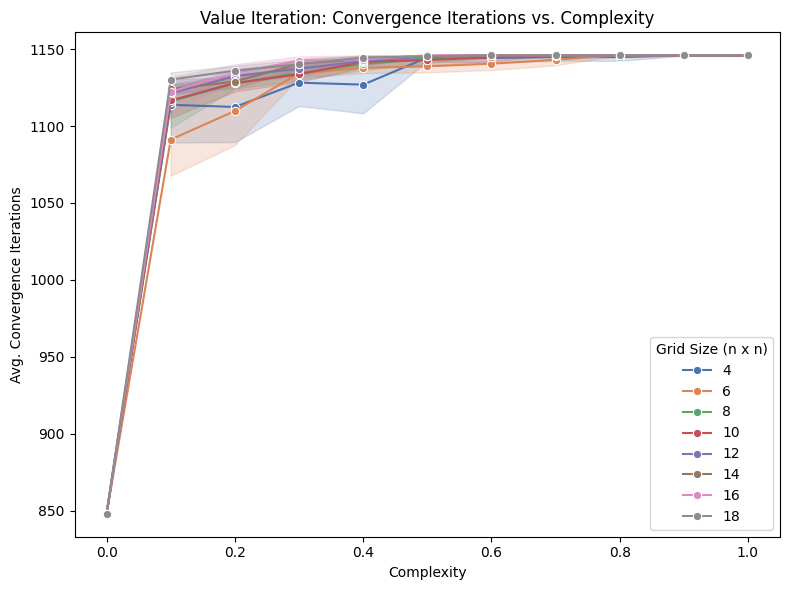

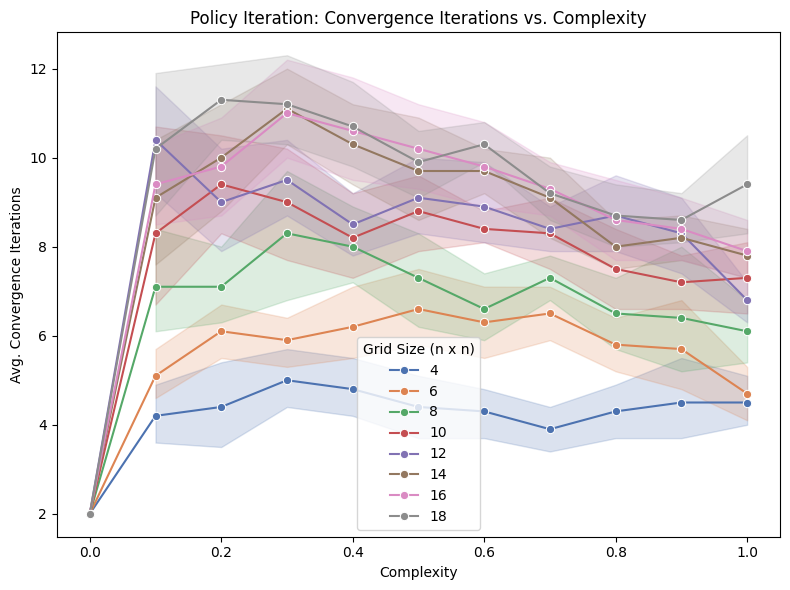

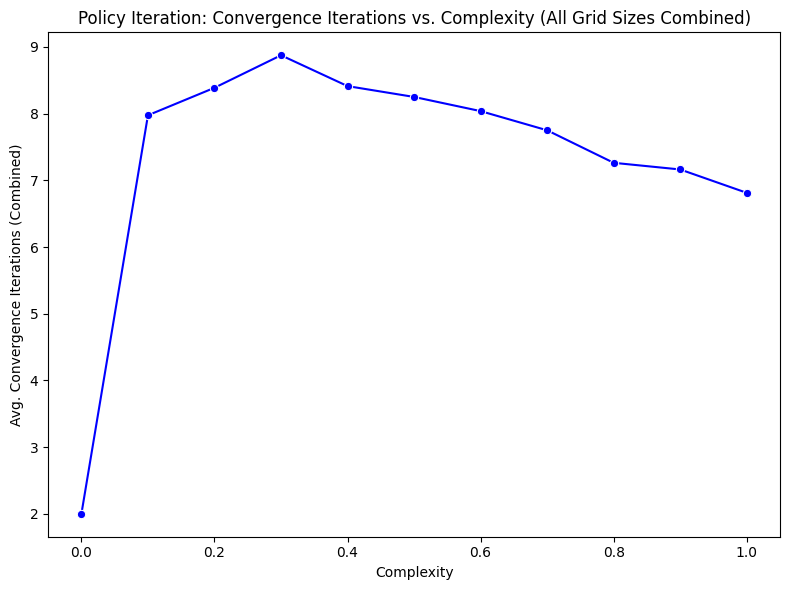

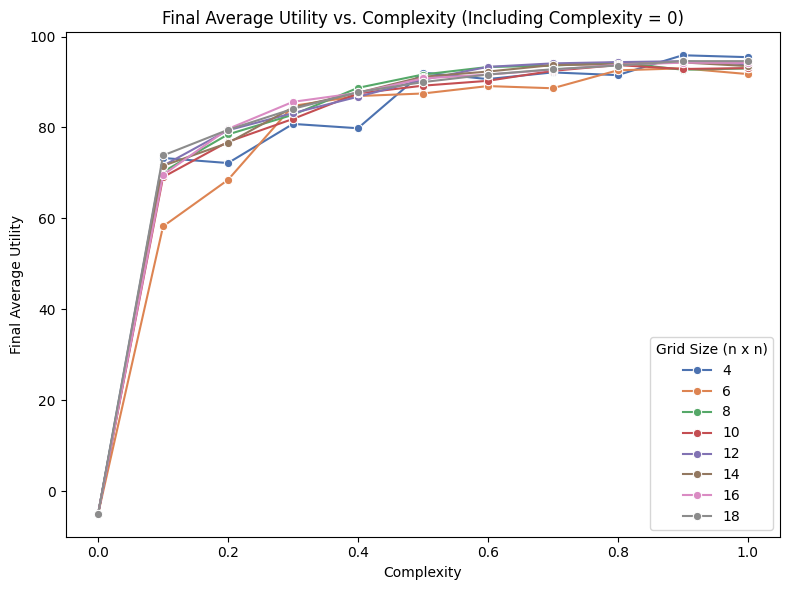

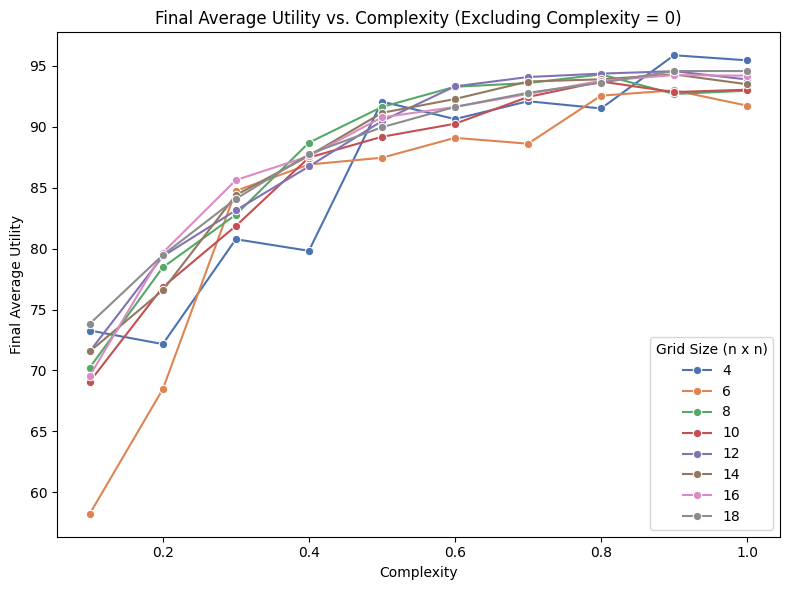

In [17]:
# Plot for Value Iteration: Convergence Iterations
custom_palette = sns.color_palette("deep", 8)
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_vi, x="complexity", y="iterations", hue="grid_size", palette = custom_palette, marker="o")
plt.title("Value Iteration: Convergence Iterations vs. Complexity")
plt.xlabel("Complexity")
plt.ylabel("Avg. Convergence Iterations")
plt.legend(title="Grid Size (n x n)")
plt.tight_layout()
plt.show()

# Plot for Policy Iteration: Convergence Iterations
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_pi, x="complexity", y="iterations", hue="grid_size", palette = custom_palette, marker="o")
plt.title("Policy Iteration: Convergence Iterations vs. Complexity")
plt.xlabel("Complexity")
plt.ylabel("Avg. Convergence Iterations")
plt.legend(title="Grid Size (n x n)")
plt.tight_layout()
plt.show()

# Plot for Policy Iteration ignoring grid sizes
df_pi_combined = df_pi.groupby("complexity")["iterations"].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_pi_combined, x="complexity", y="iterations", marker="o", color="blue")
plt.title("Policy Iteration: Convergence Iterations vs. Complexity (All Grid Sizes Combined)")
plt.xlabel("Complexity")
plt.ylabel("Avg. Convergence Iterations (Combined)")
plt.tight_layout()
plt.show()


# --------------------------
# Plot 2: Final Average Utility vs. Complexity
# --------------------------

df_util = df.groupby(["grid_size", "complexity"])["final_avg_utility"].mean().reset_index()

# Plot 1: Including complexity = 0
plt.figure(figsize=(8,6))
sns.lineplot(data=df_util, x="complexity", y="final_avg_utility", hue="grid_size", palette = custom_palette, marker="o")
plt.title("Final Average Utility vs. Complexity (Including Complexity = 0)")
plt.xlabel("Complexity")
plt.ylabel("Final Average Utility")
plt.legend(title="Grid Size (n x n)")
plt.tight_layout()
plt.show()

# Plot 2: Excluding complexity = 0
df_util_excl = df_util[df_util["complexity"] != 0]
plt.figure(figsize=(8,6))
sns.lineplot(data=df_util_excl, x="complexity", y="final_avg_utility", hue="grid_size", palette = custom_palette, marker="o")
plt.title("Final Average Utility vs. Complexity (Excluding Complexity = 0)")
plt.xlabel("Complexity")
plt.ylabel("Final Average Utility")
plt.legend(title="Grid Size (n x n)")
plt.tight_layout()
plt.show()

Note: average utility values exclude walls but do not handle isolated cells (i.e., surrounded on all 4 sides by walls and/or boundaries)

#### Relationship between grid size and convergence

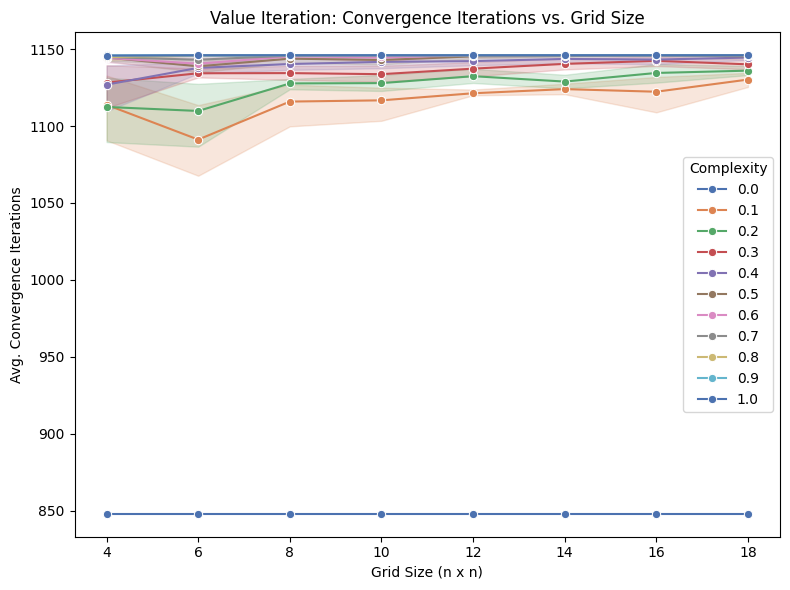

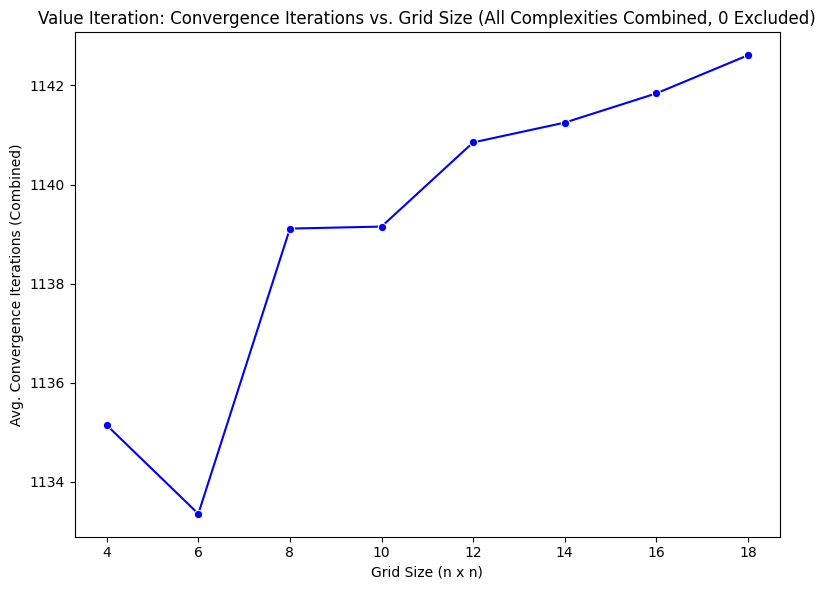

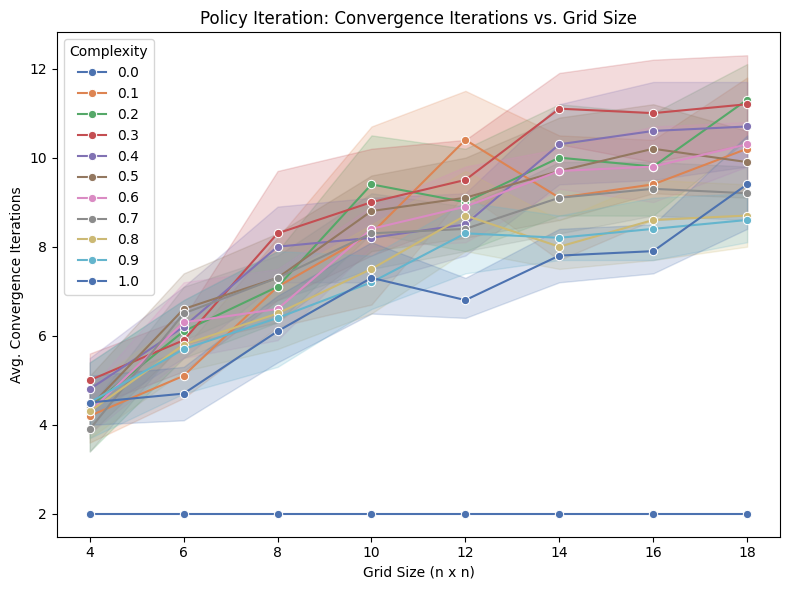

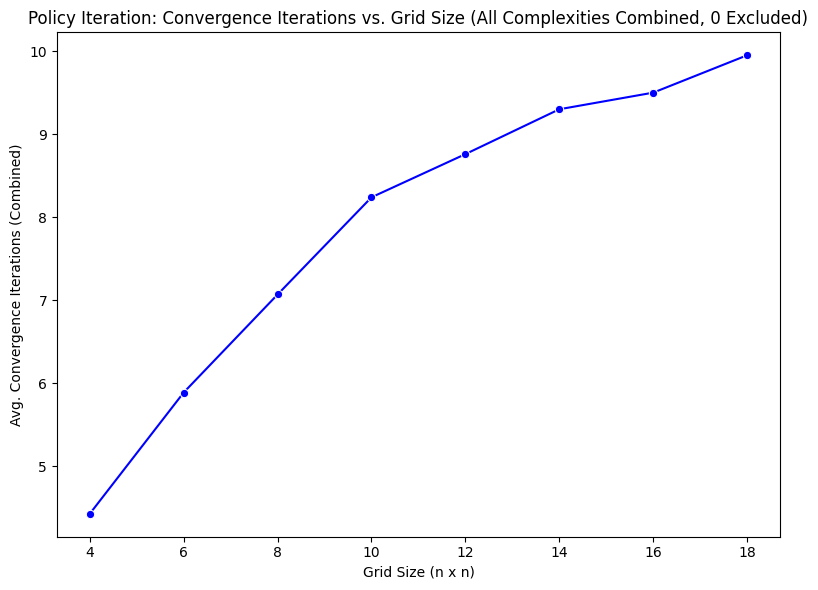

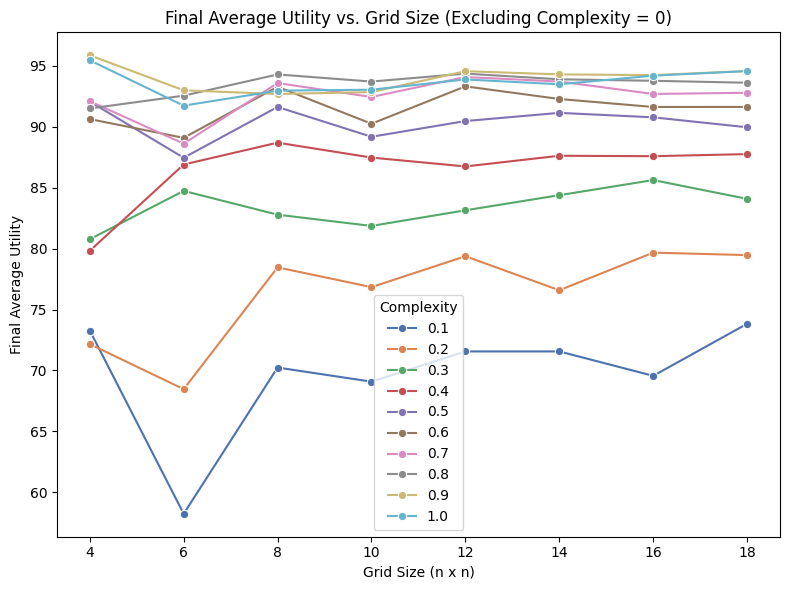

In [16]:
# Plot for Value Iteration: Convergence Iterations vs. Grid Size
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_vi, x="grid_size", y="iterations", 
             hue="complexity", marker="o", palette="deep")
plt.title("Value Iteration: Convergence Iterations vs. Grid Size")
plt.xlabel("Grid Size (n x n)")
plt.ylabel("Avg. Convergence Iterations")
plt.legend(title="Complexity")
plt.tight_layout()
plt.show()

# Plot for Value Iteration Average Iterations excl. complexity = 0
df_vi_nonzero = df_vi[df_vi["complexity"] != 0]
df_vi_combined = df_vi_nonzero.groupby("grid_size")["iterations"].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_vi_combined, x="grid_size", y="iterations", marker="o", color="blue")
plt.title("Value Iteration: Convergence Iterations vs. Grid Size (All Complexities Combined, 0 Excluded)")
plt.xlabel("Grid Size (n x n)")
plt.ylabel("Avg. Convergence Iterations (Combined)")
plt.tight_layout()
plt.show()

# Plot for Policy Iteration: Convergence Iterations vs. Grid Size
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_pi, x="grid_size", y="iterations", 
             hue="complexity", marker="o", palette="deep")
plt.title("Policy Iteration: Convergence Iterations vs. Grid Size")
plt.xlabel("Grid Size (n x n)")
plt.ylabel("Avg. Convergence Iterations")
plt.legend(title="Complexity")
plt.tight_layout()
plt.show()

# Plot for Policy Iteration Average Iterations excl. complexity = 0
df_pi_nonzero = df_pi[df_pi["complexity"] != 0]
df_pi_combined = df_pi_nonzero.groupby("grid_size")["iterations"].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_pi_combined, x="grid_size", y="iterations", marker="o", color="blue")
plt.title("Policy Iteration: Convergence Iterations vs. Grid Size (All Complexities Combined, 0 Excluded)")
plt.xlabel("Grid Size (n x n)")
plt.ylabel("Avg. Convergence Iterations (Combined)")
plt.tight_layout()
plt.show()

# Plot Final Average Utility vs. Grid Size
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_util_excl, x="grid_size", y="final_avg_utility", 
             hue="complexity", marker="o", palette="deep")
plt.title("Final Average Utility vs. Grid Size (Excluding Complexity = 0)")
plt.xlabel("Grid Size (n x n)")
plt.ylabel("Final Average Utility")
plt.legend(title="Complexity")
plt.tight_layout()
plt.show()